# Author:  Omkar Gangan

# Data Science & Business Analytics Internship

# The Spark Foundation

# GRIPJAN21

# Task 1: Predict the percentage of a student based on the no. of study hours.


In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading Data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<Figure size 864x504 with 0 Axes>

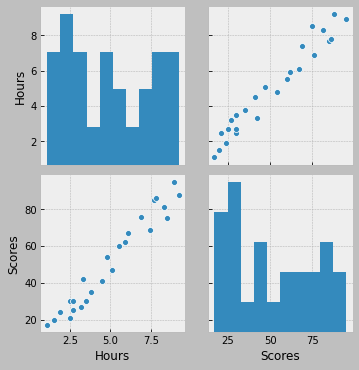

In [13]:
plt.style.use('bmh')
plt.figure(figsize=(12,7))
sns.pairplot(df)

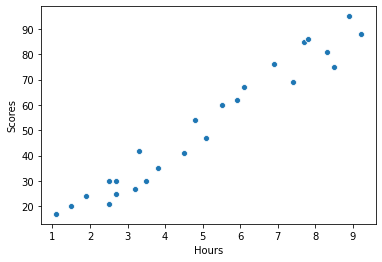

In [12]:
sns.scatterplot(x='Hours',y='Scores',data=df)

In [15]:
X = df[['Hours']]

In [16]:
y = df['Scores']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
# training the algorithm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [32]:
# Making Predictions
predictions = lm.predict(X_test) # Prediction the scores

In [34]:
predictions

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

In [35]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
16,30,26.845397
10,85,77.458594
22,35,39.498696
19,69,74.538601
7,60,56.045318


In [40]:
lm.score(X_test,y_test)

0.9377551740781869

# What will be predicted score if a student studies for 9.25 hrs/ day? 


In [52]:
hours = 9.25
own_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.5452195402996


In [48]:
# Evaluating the Model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predictions)) 

Mean Absolute Error: 4.937597792467705
